# PCA


The principal components are the eigenvectors+eigenvalues of the Covariance matrix of our data. 

This is because we are looking for the "Direction of stretching and how much streching happens" regarding the variance of our data. 

In [1]:
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np

digits = pd.DataFrame(load_digits()['data'])
classes = load_digits(return_X_y=True)[1]

<AxesSubplot:>

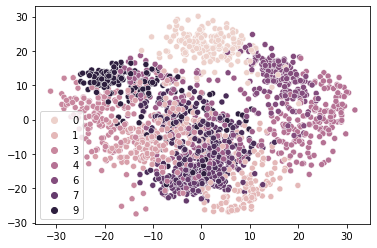

In [2]:
low_dim_digits = PCA(n_components=2).fit_transform(digits)
sns.scatterplot(x=low_dim_digits[:,0], y=low_dim_digits[:,1], hue=classes)

<AxesSubplot:>

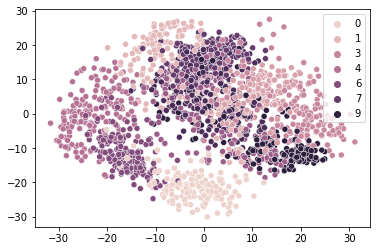

In [3]:
digits_normed = digits - digits.mean()

# compute the covariance matrix 
cov_matrix = digits_normed.T  @ digits_normed / len(digits_normed) # same as digits_normed.cov()
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values, eigen_vectors

# Sort eigen values end eigen vectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# Select the 2 best
eigenvector_subset = sorted_eigenvectors[:, 0:2]

X_reduced = np.dot(eigenvector_subset.transpose(), digits_normed.transpose()).transpose()
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=classes)